In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import seaborn as sn
#from sympy import latex
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import os,sys,math
from sympy import *
import time
from zipfile import ZipFile
from matplotlib import rc
rc('mathtext', fontset='cm')
import matplotlib.colors as mcolors


In [2]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
#%matplotlib notebook

#### Scikit Learn

In [3]:
# Pipeline-Linear Regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
#cross validation
from sklearn.model_selection import cross_validate, LeaveOneOut

In [4]:
import UR_utils
from UR_utils import *

#### Data 

In [5]:
df_static = pd.read_csv('./NS_data_for_each_EoS/static_data')
df = pd.read_csv('./NS_data_for_each_EoS/tot_data')

In [6]:
#df = df[df['r_ratio']>=0.6].copy()
df2 = df[(df['r_ratio']>=0.6) &(df['sigma']!= 0)].copy()  #Static NSs are excluded

In [7]:
#df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [8]:
df['g_eq/g_pole'] = df['g_eq_scaled']/df['g_pole_scaled']
df['g_pole/g_eq'] = df['g_eq/g_pole']**(-1)


In [9]:
eos_labels = [np.unique(df['EoS'])[i] for i in range(0, len(np.unique(df['EoS'])))]

# Choose the values relevant for each EoS
unique_values = np.unique(df['EoS']) # EoS labels

# Separate the DataFrame into a list of DataFrames based on unique 'EoS' values
eos_data = [df[df['EoS'] == value].reset_index(drop=True) for value in unique_values]
eos_data2 = [df2[df2['EoS'] == value].reset_index(drop=True) for value in unique_values]


C_s, sigma_s, e_s, R_s = symbols("C, \sigma, e, \mathcal{R}")


In [10]:
df

r_ratio         C     sigma       f(Hz)      Rpole        Req  \
0        0.600  0.096782  0.857636  771.416051  11.193375  17.819002   
1        0.625  0.098536  0.767869  759.382346  11.259163  17.282354   
2        0.650  0.099794  0.687591  743.581443  11.341016  16.807956   
3        0.675  0.100671  0.614928  724.602216  11.435141  16.383209   
4        0.700  0.101280  0.548535  702.909398  11.538995  15.999227   
...        ...       ...       ...         ...        ...        ...   
42689    1.000  0.232286  0.000000    0.000000  11.988707  11.988707   
42690    1.000  0.238953  0.000000    0.000000  11.768610  11.768610   
42691    1.000  0.243464  0.000000    0.000000  11.635078  11.635078   
42692    1.000  0.248014  0.000000    0.000000  11.495821  11.495821   
42693    1.000  0.253054  0.000000    0.000000  11.303028  11.303028   

       Rpol/Req  eccentricity  g_0(km^(-1))  g_scaled  g_eq_scaled  \
0      0.628171  7.780756e-01      0.006048  0.218531     0.218531   
1      0.651483  7.586631e-01      0.006363  0.318983     0.318983   
2      0.674741  7.380546e-01      0.006636  0.405624     0.405624   
3      0.697979  7.161179e-01      0.006876  0.480927     0.480927   
4      0.721222  6.927040e-01      0.007089  0.547039     0.547039   
...         ...           ...           ...       ...          ...   
42689  1.000000  0.000000e+00      0.026479  0.999996     0.999996   
42690  1.000000  1.490116e-08      0.028100  0.999985     0.999985   
42691  1.000000  1.490116e-08      0.029213  0.999987     0.999987   
42692  1.000000  2.580957e-08      0.030390  0.999971     0.999971   
42693  1.000000  1.490116e-08      0.031857  1.000033     1.000033   

       g_pole_scaled  dlogR_dtheta_max             EoS  g_eq/g_pole  \
0           1.916079      4.688194e-01       DS(CMF)-3     0.114051   
1           1.803305      4.326175e-01       DS(CMF)-3     0.176888   
2           1.707036      3.975184e-01       DS(CMF)-3     0.237619   
3           1.624159      3.632765e-01       DS(CMF)-3     0.296108   
4           1.551000      3.299753e-01       DS(CMF)-3     0.352701   
...              ...               ...             ...          ...   
42689       0.999996      3.463889e-13  DS(CMF)-2-hybr     1.000000   
42690       0.999985      1.466969e-13  DS(CMF)-2-hybr     1.000000   
42691       0.999987      9.525696e-13  DS(CMF)-2-hybr     1.000000   
42692       0.999971      8.599475e-14  DS(CMF)-2-hybr     1.000000   
42693       1.000033      4.041204e-13  DS(CMF)-2-hybr     1.000000   

       g_pole/g_eq  
0         8.767984  
1         5.653291  
2         4.208419  
3         3.377145  
4         2.835265  
...            ...  
42689     1.000000  
42690     1.000000  
42691     1.000000  
42692     1.000000  
42693     1.000000  

[42694 rows x 16 columns]

In [11]:
c_color = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow',
          'brown', 'pink', 'olive', 'gray', 'lime', 'teal', 'gold', 'indigo', 'violet',
          'salmon', 'orchid', 'seagreen', 'sienna', 'darkorange', 'lightcoral', 'dodgerblue',
          'darkslategray', 'crimson', 'limegreen', 'maroon', 'peru', 'royalblue', 'slateblue',
          'mediumseagreen', 'turquoise', 'deeppink', 'darkviolet', 'darkseagreen', 'navy',
          'chocolate', 'mediumblue', 'slategray', 'cadetblue', 'forestgreen', 'orangered',
          'gold', 'cornflowerblue', 'darkcyan', 'darkolivegreen', 'rosybrown',
          'sienna', 'darkred', 'tomato', 'dimgrey', 'darkgreen', 'hotpink', 'burlywood',
          'midnightblue', 'darkblue', 'darkslateblue', 'firebrick', 'darkturquoise', 'plum',
          'greenyellow', 'black', 'lightgray', 'darkgray', 'deepskyblue',
          'lavender', 'palevioletred', 'darkmagenta', 'slategrey', 'turquoise', 'limegreen',
          'lightcoral']

#### Universal relation for the star's eccentricity $e = \sqrt{1- \left(\frac{R_p}{R_e}\right)^2}$ (static NSs excluded)


In [12]:
x = 'C'; y = 'sigma'; z = 'eccentricity'; z_model = 'eccentricity_model'; x_power = 'C'; y_power = 'sigma';

#### Leave one out Cross validation

In [13]:
#cv_results = c_val_performace_results_for_k(df2,x='C',y='sigma',z='eccentricity')
#cv_results
#optim_pol_degree = int(cv_results[cv_results['d(%)'] == cv_results['d(%)'].min()]['k'].iloc[0])
#optim_pol_degree = 5

In [14]:
cv_results_e = pd.read_csv('LOOCV_results/e_LOOCV_results.txt')
cv_results_e

MAE  Max_Error       MSE       d(%)   MAPE(%)  Explained_Variance    k
0  0.040421   0.156100  0.002398  61.983066  9.791475                 1.0  1.0
1  0.013682   0.049544  0.000288  23.570241  3.323055                 1.0  2.0
2  0.007252   0.037523  0.000080  11.369177  1.687115                 1.0  3.0
3  0.005109   0.021952  0.000038   6.138886  1.082114                 1.0  4.0
4  0.004652   0.019808  0.000033   4.576871  0.917538                 1.0  5.0
5  0.004365   0.019091  0.000030   3.985076  0.836672                 1.0  6.0
6  0.004357   0.018747  0.000029   3.896671  0.832603                 1.0  7.0
7  0.004302   0.018830  0.000029   3.754733  0.822461                 1.0  8.0

In [15]:
optim_pol_degree = 5

#### Linear regression on training data

In [16]:
df2[z_model], R_2_index, b_00, b_nm, power_comb_2, powers_2 = Regression_function(df2,x = x,y= y ,z=z, pol_degree=optim_pol_degree, 
                                        x_power = x_power,y_power = y_power)

#### $R^2$ index

In [17]:
R_2_index

0.9987303980077309

#### Model's coefficients

In [18]:
# model's intercept
b_00;
# model's coefficients
b_nm; 
# b_nm stored to data frame
coef=pd.DataFrame(b_nm,columns=["coef"])

In [19]:
def e_funct(C,sigma):
    results=0
    for i in range(0,len(powers_2)):
        results+=(coef["coef"][i]*C**(powers_2["C"][i])*sigma**(powers_2["sigma"][i]))
      
    return b_00 + results 

In [20]:
e_funct(C_s,sigma_s)

-99.1731626257587*C**5 + 68.055729822897*C**4*\sigma + 137.191420601953*C**4 + 12.9349885313228*C**3*\sigma**2 - 57.4743082972309*C**3*\sigma - 67.7948794728821*C**3 - 9.03315944594449*C**2*\sigma**3 + 8.0834606252312*C**2*\sigma**2 + 9.19713339469666*C**2*\sigma + 14.9006458417103*C**2 + 4.84885244516396*C*\sigma**4 - 6.44626099699597*C*\sigma**3 + 2.75499036217899*C*\sigma**2 - 1.33293692611052*C*\sigma - 1.52533604289925*C + 4.714504734503*\sigma**5 - 13.8547513636473*\sigma**4 + 15.4712200610892*\sigma**3 - 8.71280504897917*\sigma**2 + 3.04229899830747*\sigma + 0.182560763719317

In [21]:
x2 = mesh_grid_funct(3000,df2,x_name = 'C', y_name = 'sigma')[0]
y2 = mesh_grid_funct(3000,df2, x_name = 'C', y_name = 'sigma')[1]

Z2 = e_funct(x2,y2)

In [22]:
def Surface_plot_funct_e(eos_data, x,y,z, xlabel,ylabel,zlabel, view2, n_col, border_axes, X,Y,Z, l_w):

    
    fig = plt.figure(figsize=(12, 8)) 
    labels_text_size = 25
    ax = fig.add_subplot(111, projection='3d')

    dot_size = 40
    font_size = 35
    label_pad = 25
    label_size = 25


    for i in range(0, len(eos_data)):
        ax.scatter3D(eos_data[i][x].to_numpy(),eos_data[i][y].to_numpy(),eos_data[i][z].to_numpy(),
                     s=dot_size, c=c_color[i], label = eos_labels[i])    

    
    ax.plot_wireframe(X, Y, Z, rstride=40, cstride=40,edgecolor='blue' ,color = 'maroon',
                      alpha=0.8, lw = l_w, antialiased=True)

    
    
    ax.view_init(30, view2)   
    ax.set_xlabel(xlabel, fontsize=font_size, labelpad=label_pad) 
    ax.set_ylabel(ylabel, fontsize=font_size, labelpad=label_pad) 
    ax.set_zlabel(zlabel, fontsize=font_size, labelpad=label_pad) 

    ax.zaxis.labelpad = 12 
    

    ax.xaxis.set_tick_params(labelsize=label_size-5)
    ax.yaxis.set_tick_params(labelsize=label_size-5)
    ax.zaxis.set_tick_params(labelsize=label_size-7)

    ax.zaxis.labelpad = 1
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.line.set_linewidth(3)
    
    ax.grid(False)

    
    plt.tight_layout()
    plt.show()   

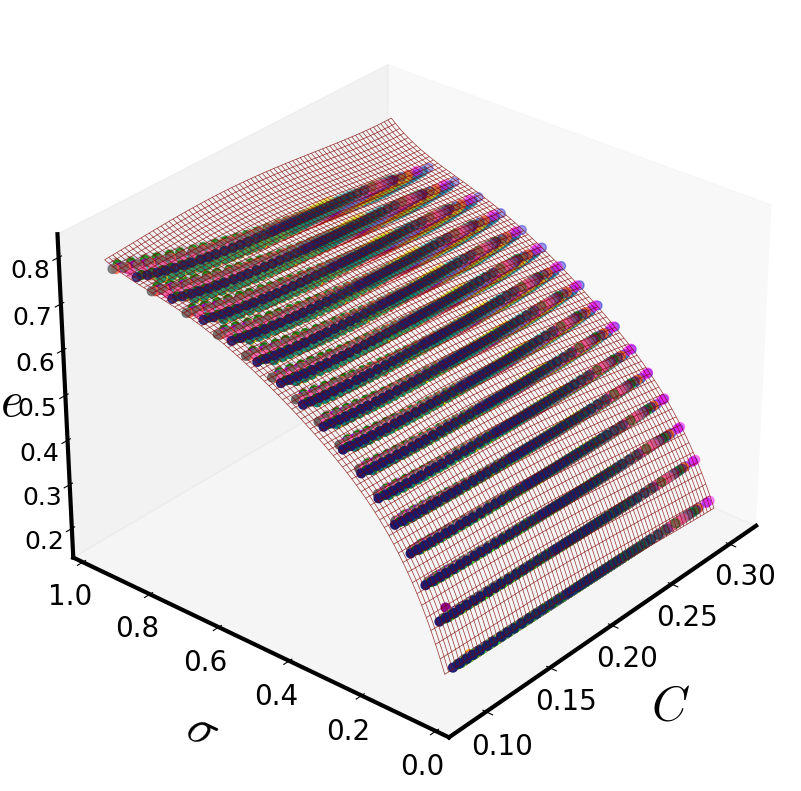

In [23]:
Surface_plot_funct_e(eos_data2, x, y, z, xlabel=r'$C$',ylabel='$\sigma$',zlabel=r'$e$', 
                     view2=220, n_col=3, border_axes=8, X=x2,Y=y2,Z=Z2, l_w=0.5)

### Fitting function's percentage error distribution

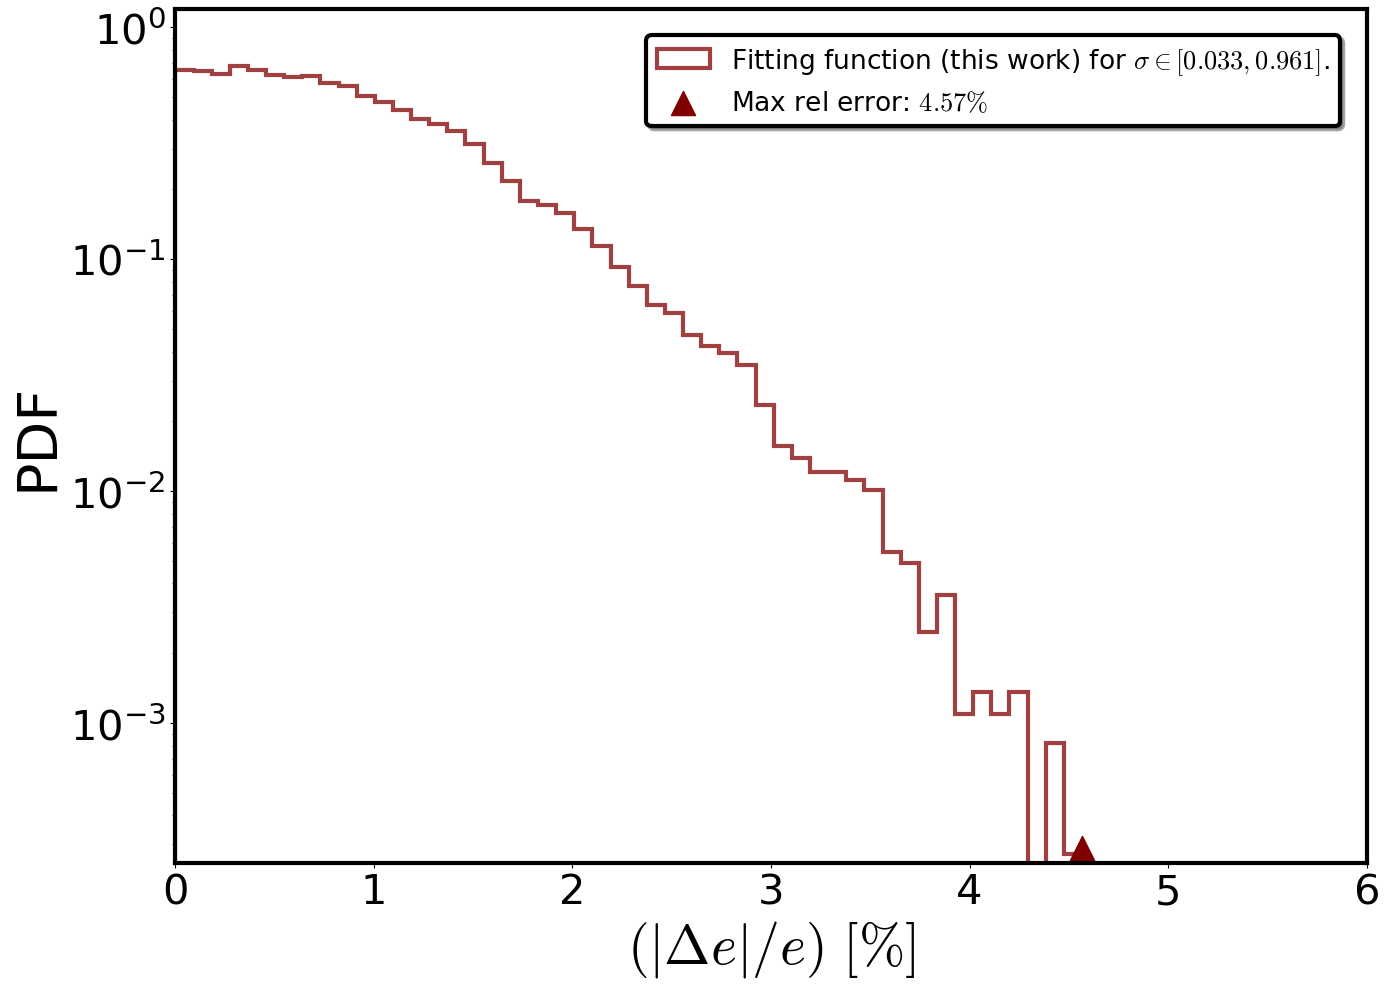

In [24]:
fig,ax = plt.subplots(figsize=(14, 10),)
labels_text_size = 40
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)

xlabel = r'$(|\Delta e| /e) \ [\%]$'
ylabel = r'PDF'

plt.xlabel(xlabel,size=labels_text_size)
plt.ylabel(ylabel,size=labels_text_size)

bins = 50
alpha = 0.75

y_reg_model = (np.abs(100*(-df2[z] + df2[z_model])/df2[z])).hist(
    density=True, 
    bins=bins, 
    lw=3, 
    edgecolor='maroon', 
    zorder=1, 
    histtype='step', 
    alpha=alpha, 
    label=f"Fitting function (this work) for $ \sigma \in[{np.round(df2['sigma'].min(), 3)}, {np.round(df2['sigma'].max(), 3)}]$.", 
    color='maroon',
    #log = True
).autoscale(enable=True, axis='both', tight=True)


vertical_lines = [4.5660]  

plt.scatter(vertical_lines[0], 2.9e-4, color='maroon',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 4.57 \%$')  

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.)


plt.yscale('log')
plt.xlim(0,6)
plt.ylim(2.5e-4,1.2)

plt.grid(False)
leg = plt.legend(loc="upper right",ncol=1, borderaxespad=1, prop={'size': 19}, shadow=True, fontsize="large")    
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

#### Universal relation for $\mathcal{R} = R_p/R_{eq}$ (All NSs included)

In [25]:
x = 'C'; y = 'sigma'; z = 'Rpol/Req'; z_model = 'Rpol/Req_model'; x_power = 'C'; y_power = 'sigma'; #Rpol/Req

#### Leave one out Cross validation

In [26]:
#cv_results = c_val_performace_results_for_k(df,x='C',y='sigma',z='Rpol/Req')
#cv_results
#optim_pol_degree = int(cv_results[cv_results['d(%)'] == cv_results['d(%)'].min()]['k'].iloc[0])

In [27]:
cv_results_R = pd.read_csv('LOOCV_results/Rpol_Req_LOOCV_results.txt')
cv_results_R

MAE  Max_Error       MSE       d(%)   MAPE(%)  Explained_Variance    k
0  0.011254   0.068301  0.000196  10.826695  1.401666                 1.0  1.0
1  0.003819   0.027850  0.000025   4.414587  0.489926                 1.0  2.0
2  0.003213   0.019550  0.000019   3.117947  0.421023                 1.0  3.0
3  0.003112   0.018761  0.000019   2.801806  0.409053                 1.0  4.0
4  0.003089   0.019980  0.000019   2.948913  0.405631                 1.0  5.0
5  0.003067   0.020069  0.000018   2.962009  0.402397                 1.0  6.0
6  0.003043   0.020626  0.000018   3.152602  0.398805                 1.0  7.0
7  0.003014   0.020130  0.000018   3.076814  0.394644                 1.0  8.0

In [28]:
optim_pol_degree = 4

#### LInear regression on training data

In [29]:
df[z_model], R_2_index, C_00, C_nm, pow_comb_3, powers_3 = Regression_function(df,x = x,y= y ,z=z, pol_degree=optim_pol_degree, 
                                        x_power = x_power,y_power = y_power)

##### $R^2$ index

In [30]:
 R_2_index

0.9983153014546605

#### Model's coefficients

In [31]:
# model's intercept
C_00;
# model's coefficients
C_nm;
# C_nm stored to data frame
coef=pd.DataFrame(C_nm,columns=["coef"])

In [32]:
def R_funct(C,sigma):
    results=0
    for i in range(0,len(powers_3)):
        results+=(coef["coef"][i]*C**(powers_3["C"][i])*sigma**(powers_3["sigma"][i]))
      
    return C_00 + results 

In [33]:
R_funct(C_s,sigma_s)

-45.3015234274801*C**4 - 7.52466249012259*C**3*\sigma + 36.1318805958812*C**3 - 2.50668582910242*C**2*\sigma**2 + 8.66838156199219*C**2*\sigma - 10.4561101976216*C**2 + 0.527775373801867*C*\sigma**3 - 0.226904263928412*C*\sigma**2 - 1.45892092679705*C*\sigma + 1.29663161750561*C + 0.196118434593753*\sigma**4 - 0.440968195037673*\sigma**3 + 0.544639042230603*\sigma**2 - 0.617710700567153*\sigma + 0.942328028476575

In [34]:
x3 = mesh_grid_funct(1500,df,x_name = 'C', y_name = 'sigma')[0]
y3 = mesh_grid_funct(1500,df, x_name = 'C', y_name = 'sigma')[1]

Z3 = R_funct(x3,y3)

In [35]:
def Surface_plot_funct_R(eos_data, x,y,z, xlabel,ylabel,zlabel, view2, n_col, border_axes, X,Y,Z, l_w):
    
    fig = plt.figure(figsize=(12, 8)) 
    labels_text_size = 25
    ax = fig.add_subplot(111, projection='3d')

    dot_size = 40
    font_size = 30
    label_pad = 20
    label_size = 20

    for i in range(0, len(eos_data)):
        ax.scatter3D(eos_data[i][x].to_numpy(),eos_data[i][y].to_numpy(),eos_data[i][z].to_numpy(),
                     s=dot_size, c=c_color[i]) 

    
    ax.plot_wireframe(X, Y, Z, rstride=40, cstride=40,edgecolor='blue' ,color = 'maroon',
                      alpha=0.8, zorder = 15, lw = l_w, antialiased=True)
    
    
    
    ax.view_init(30, view2)   
    ax.set_xlabel(xlabel, fontsize=font_size, labelpad=label_pad) 
    ax.set_ylabel(ylabel, fontsize=font_size, labelpad=label_pad) 
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel(zlabel, fontsize=font_size, labelpad=label_pad, rotation=0) 

    
    ax.zaxis.labelpad = 6
    
    
    ax.xaxis.set_tick_params(labelsize=label_size-4)
    ax.yaxis.set_tick_params(labelsize=label_size-4)
    ax.zaxis.set_tick_params(labelsize=label_size-5)
    
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.line.set_linewidth(2)
    
    ax.grid(False)

    plt.tight_layout()
    plt.show()    
    

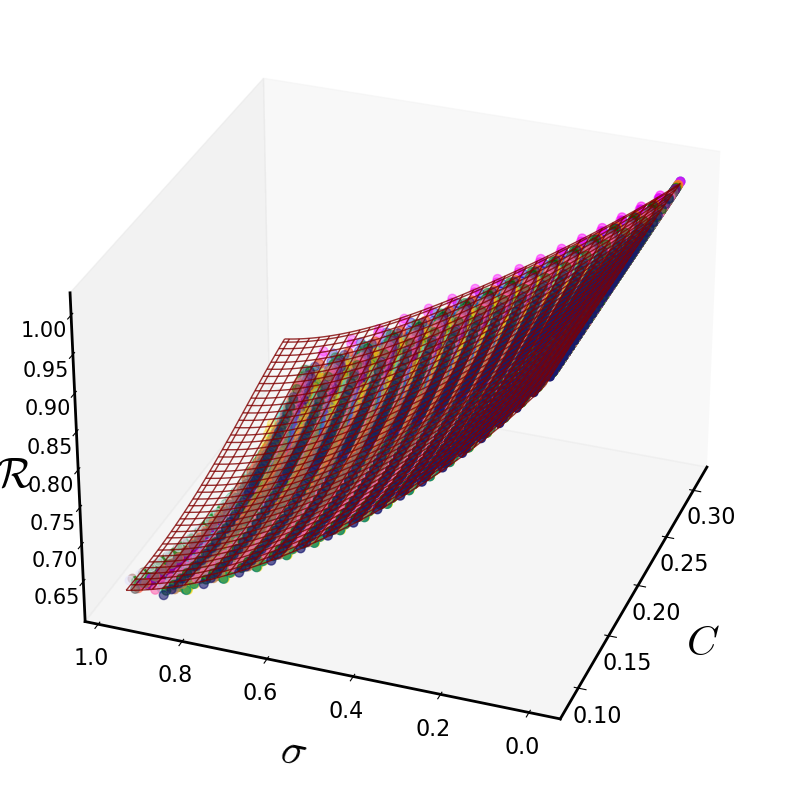

In [36]:
Surface_plot_funct_R(eos_data, x, y, z, xlabel=r'$C$',ylabel='$\sigma$',zlabel=r'$\mathcal{R}$', 
                     view2=200, n_col=1, border_axes=1, X=x3,Y=y3,Z=Z3, l_w=1.)


#### Absolute relative error distribution

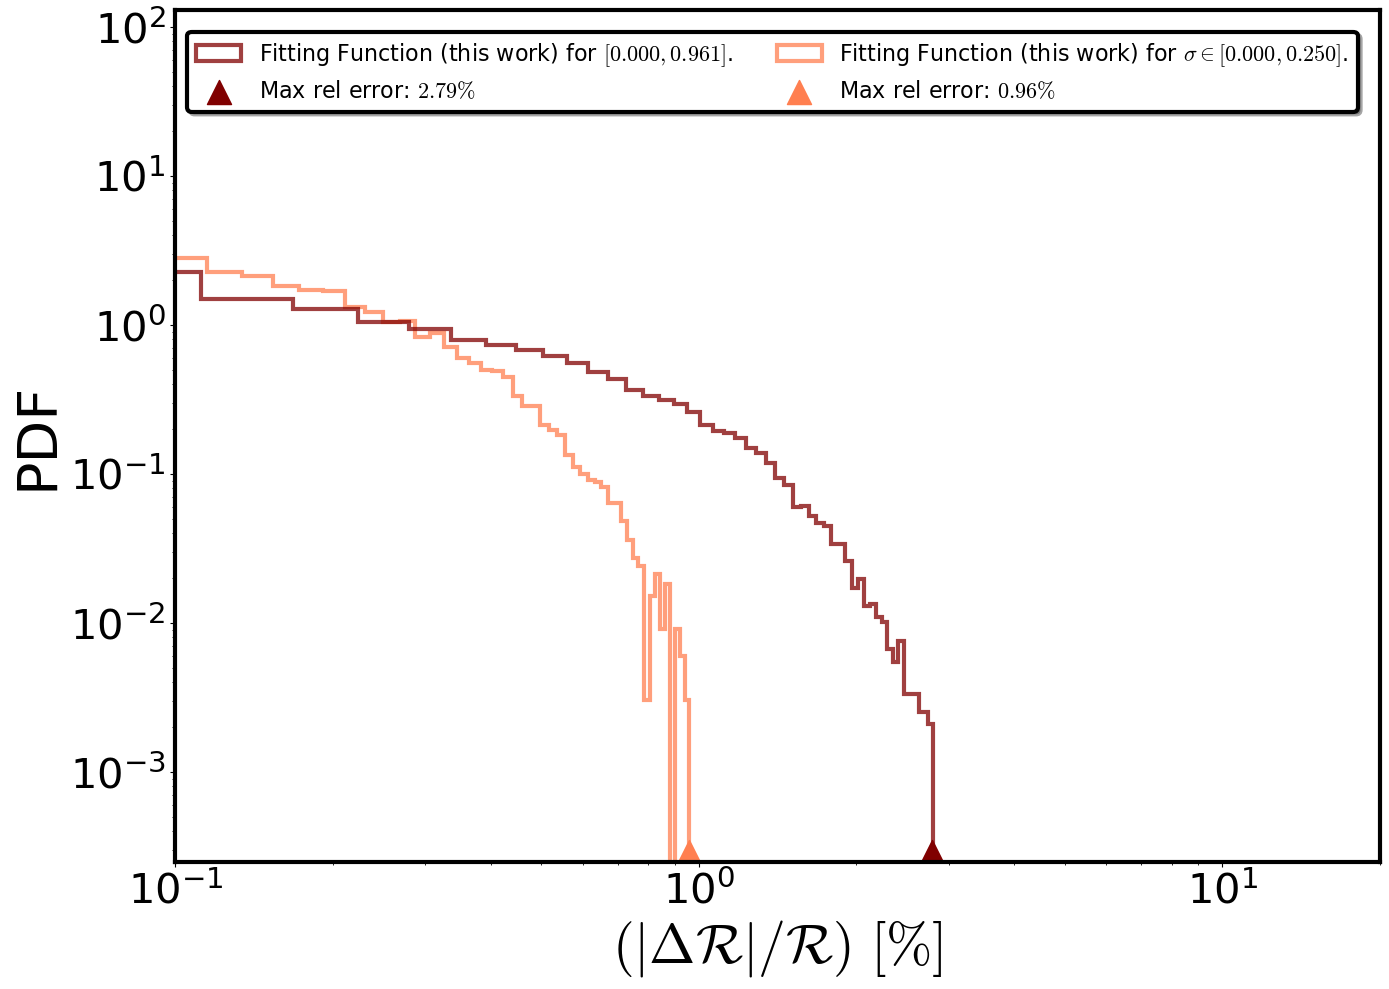

In [37]:
fig,ax = plt.subplots(figsize=(14, 10),)
labels_text_size = 40
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)


xlabel = r'$(|\Delta \mathcal{R}| /\mathcal{R}) \ [\%]$'
ylabel = r'PDF'

plt.xlabel(xlabel,size=labels_text_size)
plt.ylabel(ylabel,size=labels_text_size)

bins = 50
alpha = 0.75

y_reg_model = abs(100*(-df[z]+df[z_model])/df[z]).hist(
    
    density = True,
    bins=bins,
    lw = 3,
    edgecolor ='maroon', 
    histtype='step', 
    alpha = alpha, 
    label = f"Fitting Function (this work) for $[0.000, {np.round(df['sigma'].max(), 3)}]$.", 
    color = 'maroon').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines = [2.79] 
plt.scatter(vertical_lines[0], 2.9e-4, color='maroon',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 2.79 \%$')  

y_reg_less_0_25 = abs(100*(-df[df['sigma']<=0.25][z]+df[df['sigma']<=0.25][z_model])/df[df['sigma']<=0.25][z]).hist(
    
    density = True,
    bins=bins,
    edgecolor ='coral',
    lw = 3,
    histtype='step', 
    zorder = 1, 
    alpha = alpha,
    label = f"Fitting Function (this work) for $\sigma \in[0.000, 0.250]$.",
    color = 'coral').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines = [0.9581596145435877, None]  
plt.scatter(vertical_lines[0], 2.9e-4, color='coral',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 0.96 \%$')  

plt.yscale('log')
plt.xscale('log')


plt.xlim(1e-1,20)
plt.ylim(2.5e-4,130)


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.0)

plt.grid(False)
leg = plt.legend(loc="upper right",ncol=2, borderaxespad=1, prop={'size': 16}, shadow=True, fontsize="large")    
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

### Slowly rotating case: Absolute relative error distribution

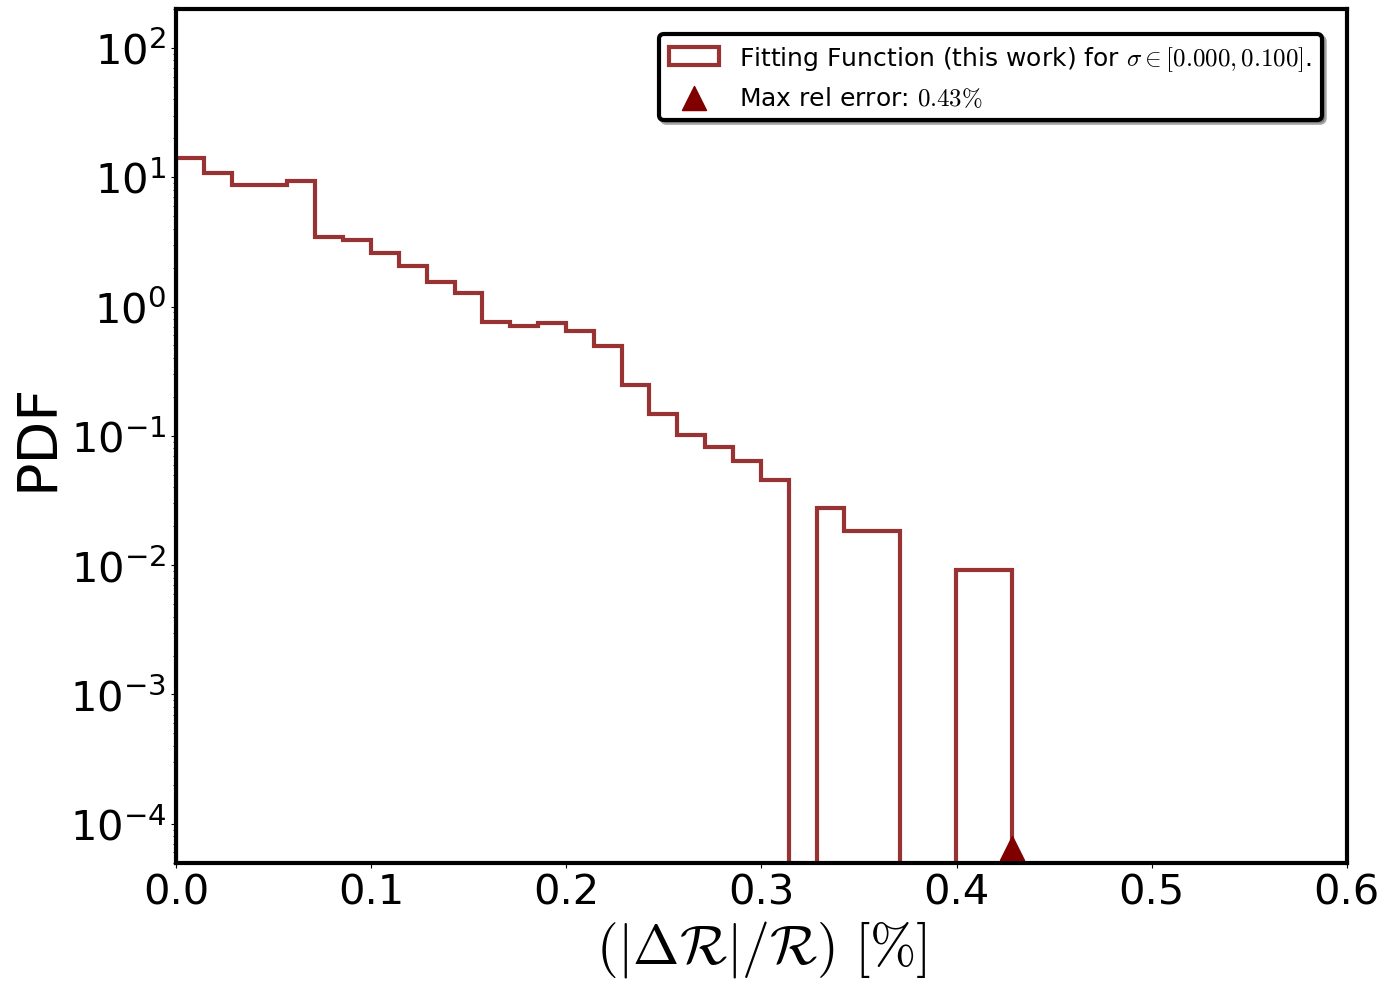

In [38]:
fig,ax = plt.subplots(figsize=(14, 10),)
labels_text_size = 40
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)


xlabel = r'$(|\Delta \mathcal{R}| /\mathcal{R}) \ [\%]$'
ylabel = f'PDF'

plt.xlabel(xlabel,size=labels_text_size)
plt.ylabel(ylabel,size=labels_text_size)

bins = 50
alpha = 0.8
y_reg_0_1_model = abs(100*(-df[df['sigma']<=0.1][z]+df[df['sigma']<=0.1][z_model])/df[df['sigma']<=0.1][z]).hist(
                    density = True,
                    bins=bins-20,
                    lw=3, 
                    edgecolor ='maroon', 
                    zorder = 1, 
                    histtype='step',
                    alpha = alpha,
                    label = f'Fitting Function (this work) for $\sigma \in[0.000, 0.100]$.', color = 'maroon').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines_reg_0_1 = [0.42818322]  
plt.scatter(vertical_lines_reg_0_1[0], 0.65e-4, color='maroon',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 0.43 \%$')  
plt.yscale('log')

plt.ylim(0.5e-4,200)
plt.xlim(0,0.6)


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.0)

plt.grid(False)
leg = plt.legend(loc="upper right",ncol=1, borderaxespad=1, prop={'size': 18}, shadow=True, fontsize="large")   
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('black')
    
plt.tight_layout()
plt.show()

### Nonrotating limit

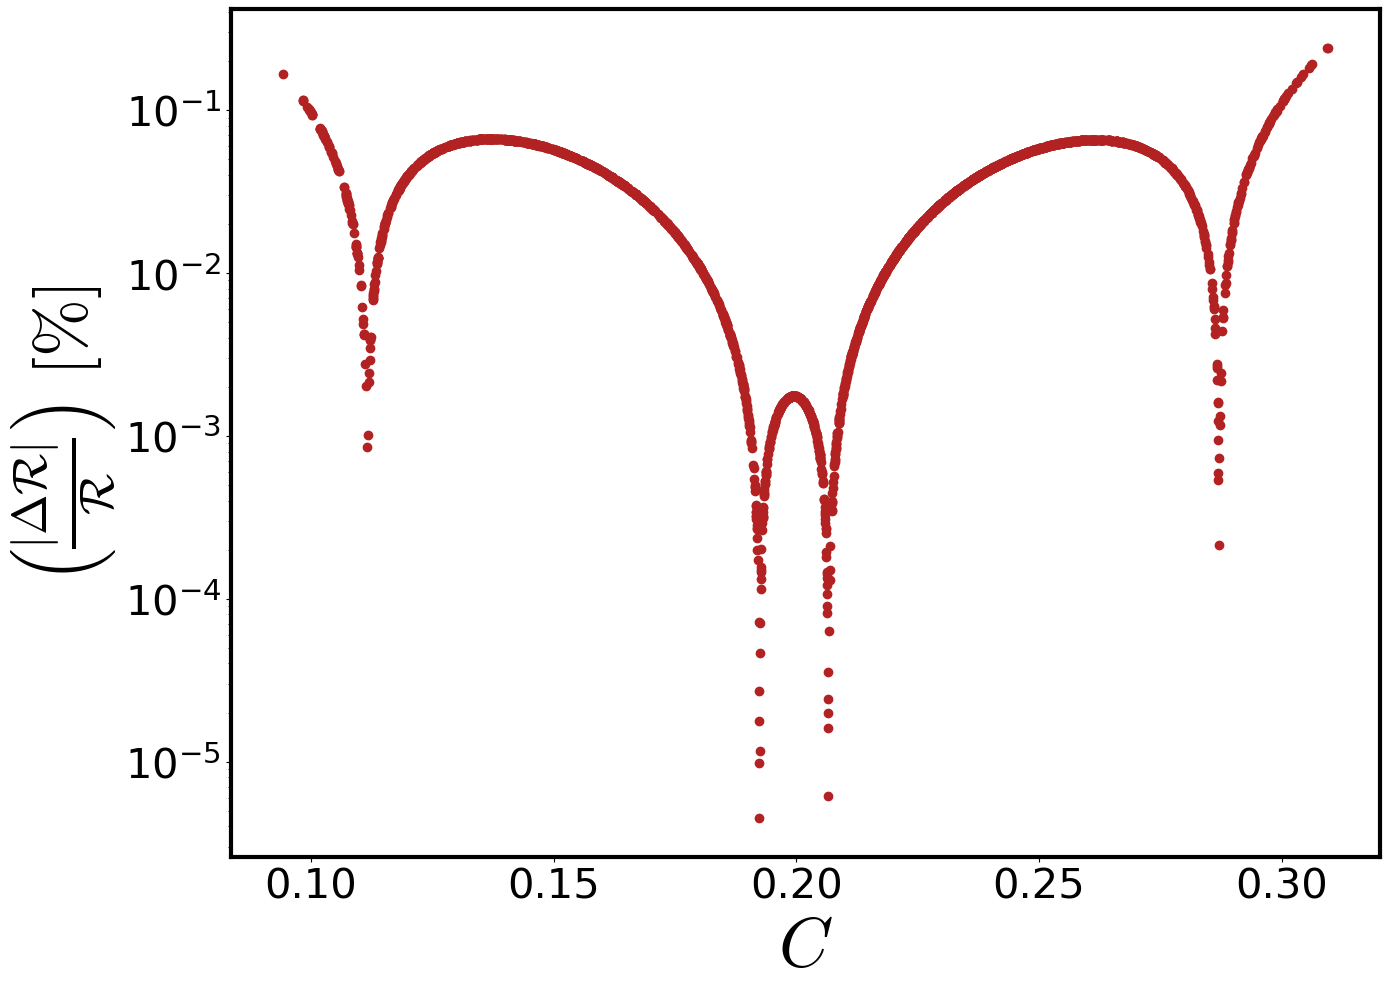

In [39]:
fig,ax = plt.subplots(figsize=(14, 10),)  

labels_text_size = 50
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)

plt.xlabel(r'$C$',size=labels_text_size)
plt.ylabel(r'$ \left(\frac{|\Delta \mathcal{R}|}{\mathcal{R}}\right) \ [\%]$',size=labels_text_size)

plt.scatter(df_static['C'],100*abs((R_funct(df_static['C'],0))-df_static['Rpol/Req'])/df_static['Rpol/Req'], color = 'firebrick')  

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.0)


plt.yscale('log')

plt.tight_layout()
plt.show()


In [40]:
(100*abs((R_funct(df_static['C'],0))-df_static['Rpol/Req'])/df_static['Rpol/Req']).max()

0.24219577943114245

### Universal relation for $g_{pole}$ 

In [41]:
x = 'C'; y = 'sigma'; z = 'g_pole_scaled' ; z_model = 'g_pole_scaled_model'; x_power = 'C'; y_power = 'sigma';

#### Leave one out Cross validation

In [42]:
#cv_results = c_val_performace_results_for_k(df,x=x,y=y,z=z)
#cv_results
#optim_pol_degree = int(cv_results[cv_results['d(%)'] == cv_results['d(%)'].min()]['k'].iloc[0])


In [43]:
cv_results_g_p = pd.read_csv('LOOCV_results/g_pole_LOOCV_results.txt')
cv_results_g_p 

MAE  Max_Error       MSE      d(%)   MAPE(%)  Explained_Variance    k
0  0.015713   0.146115  0.000430  6.934889  1.176683                 1.0  1.0
1  0.005539   0.078188  0.000072  4.101918  0.384596                 1.0  2.0
2  0.004535   0.062011  0.000056  3.253231  0.303176                 1.0  3.0
3  0.004320   0.053770  0.000052  3.073449  0.286016                 1.0  4.0
4  0.004268   0.051413  0.000051  3.058724  0.282789                 1.0  5.0
5  0.004222   0.053163  0.000050  2.967900  0.280160                 1.0  6.0
6  0.004171   0.055593  0.000049  3.096514  0.277813                 1.0  7.0
7  0.004090   0.057886  0.000047  3.224207  0.272419                 1.0  8.0

In [44]:
optim_pol_degree = 4

#### Linear regression on training data

In [45]:
df[z_model], R_2_index, D_00, D_nm, pow_comb_4, powers_4 = Regression_function(df,x = x,y= y ,z=z, 
                                                  pol_degree=optim_pol_degree, x_power = x_power,
                                                  y_power = y_power)

#### $R^2$ index

In [46]:
R_2_index

0.9991471134868862

### Fractional difference distribution

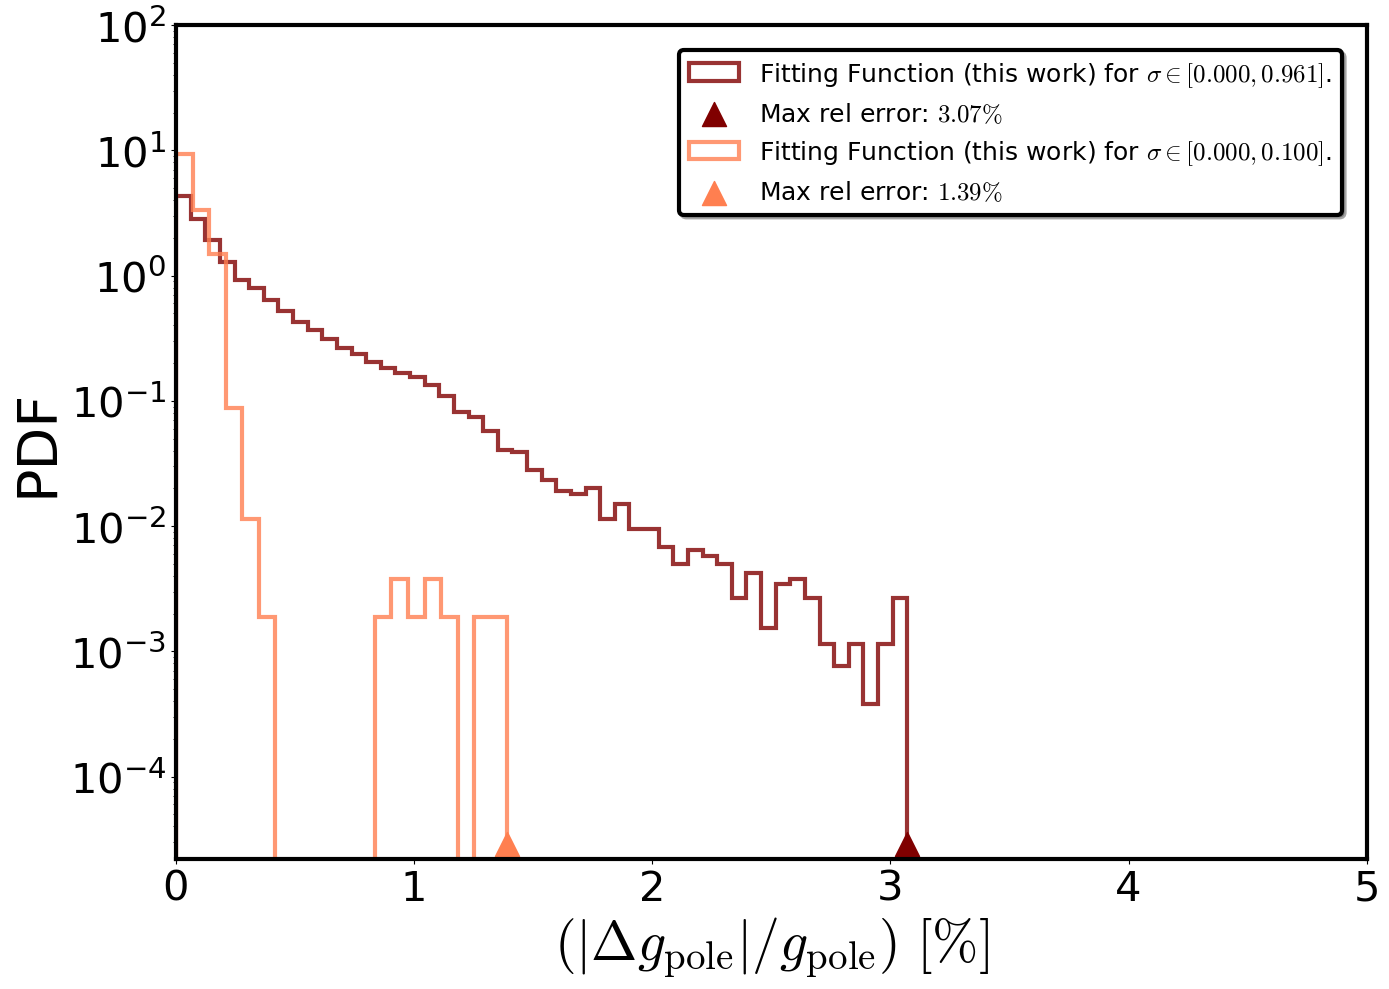

In [47]:
fig,ax = plt.subplots(figsize=(14, 10),)
labels_text_size = 40
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)

xlabel = r'$(|\Delta g_{\mathrm{pole}}| /g_{\mathrm{pole}}) \ [\%]$'
ylabel = 'PDF'

plt.xlabel(xlabel,size=labels_text_size)
plt.ylabel(ylabel,size=labels_text_size)

bins = 50
alpha = 0.8

y_reg_grav_model = abs(100*(-df[z]+df[z_model])/df[z]).hist(
                    density = True,
                    lw = 3,
                    bins=bins,
                    edgecolor ='maroon',
                    histtype='step',
                    zorder = 1, 
                    label = f"Fitting Function (this work) for $\sigma \in[0.000, {np.round(df['sigma'].max(), 3)}]$.", 
                    alpha = alpha,
                    color = 'maroon').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines = [3.070871712452435]  
plt.scatter(vertical_lines[0], 2.9e-5, color='maroon',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 3.07 \%$')  


y_reg_grav_model = abs(100*(-df[df['sigma']<=0.1][z]+df[df['sigma']<=0.1][z_model])/df[df['sigma']<=0.1][z]).hist(
                    density = True,
                    lw = 3,
                    bins=bins-30,
                    edgecolor ='coral',
                    histtype='step',
                    zorder = 1, 
                    label = r"Fitting Function (this work) for $\sigma \in[0.000, 0.100]$.", 
                    alpha = alpha,
                    color = 'coral').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines = [1.391]  
plt.scatter(vertical_lines[0], 2.9e-5, color='coral',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 1.39 \%$')  


plt.yscale('log')
plt.xlim(0,5)

plt.ylim(2.2e-5,100)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.0)

plt.grid(False)
leg = plt.legend(loc="upper right",ncol=1, borderaxespad=1, prop={'size': 18}, shadow=True, fontsize="large")    
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('black')
    
plt.tight_layout()
plt.show()



### Model's coefficients

In [48]:
# model's intercept
D_00; 
# model's coefficients
D_nm;
# D_nm stored to data frame
coef=pd.DataFrame(D_nm,columns=["coef"])

In [49]:
def g_pole_funct(C,sigma):
    results=0
    for i in range(0,len(powers_4)):
        results+=(coef["coef"][i]*C**(powers_4["C"][i])*sigma**(powers_4["sigma"][i]))
      
    return D_00 + results 

g_pole_funct(C_s,sigma_s)

-62.8045467352433*C**4 - 23.257769499827*C**3*\sigma + 52.0686732207975*C**3 + 1.11602879356068*C**2*\sigma**2 + 11.9714816462283*C**2*\sigma - 15.6899254468898*C**2 + 1.4660608155789*C*\sigma**3 - 1.46935053803782*C*\sigma**2 - 2.79057152330362*C*\sigma + 2.0186963881549*C + 0.488086658631061*\sigma**4 - 0.800025443187702*\sigma**3 + 0.553202313363455*\sigma**2 + 1.08421869564886*\sigma + 0.908110925704063

In [50]:
x4 = mesh_grid_funct(1500,df,x_name = 'C', y_name = 'sigma')[0]
y4 = mesh_grid_funct(1500,df, x_name = 'C', y_name = 'sigma')[1]

Z4 = g_pole_funct(x4,y4)

In [51]:
def Surface_plot_funct_gp(eos_data, x,y,z, xlabel,ylabel,zlabel, view2, n_col, border_axes, X,Y,Z, l_w):
    
    fig = plt.figure(figsize=(12, 8)) 
    labels_text_size = 28
    ax = fig.add_subplot(111, projection='3d')

    dot_size = 30
    font_size = 30
    label_pad = 20
    label_size = 20

    for i in range(0, len(eos_data)):
        ax.scatter3D(eos_data[i][x].to_numpy(),eos_data[i][y].to_numpy(),eos_data[i][z].to_numpy(),
                     s=dot_size, c=c_color[i])  #, label = eos_labels[i]  

    
    ax.plot_wireframe(X, Y, Z, rstride=40, cstride=40,edgecolor='blue' ,color = 'maroon',
                      alpha=0.6, zorder = 15, lw = l_w, antialiased=True)
    
    
    
    ax.view_init(30, view2)   
    ax.set_xlabel(xlabel, fontsize=font_size, labelpad=label_pad) 
    ax.set_ylabel(ylabel, fontsize=font_size, labelpad=label_pad) 
    
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel(zlabel, fontsize=font_size,labelpad=label_pad,rotation = 90)
    ax.zaxis.set_tick_params(pad=0)
    ax.zaxis.labelpad = 5
    

    ax.zaxis._axinfo['label']['space_factor'] = 10.0
 
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    ax.zaxis.set_tick_params(labelsize=label_size)
    
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.line.set_linewidth(2)
    
    ax.grid(False)
    
    plt.tight_layout()
    plt.show()
    

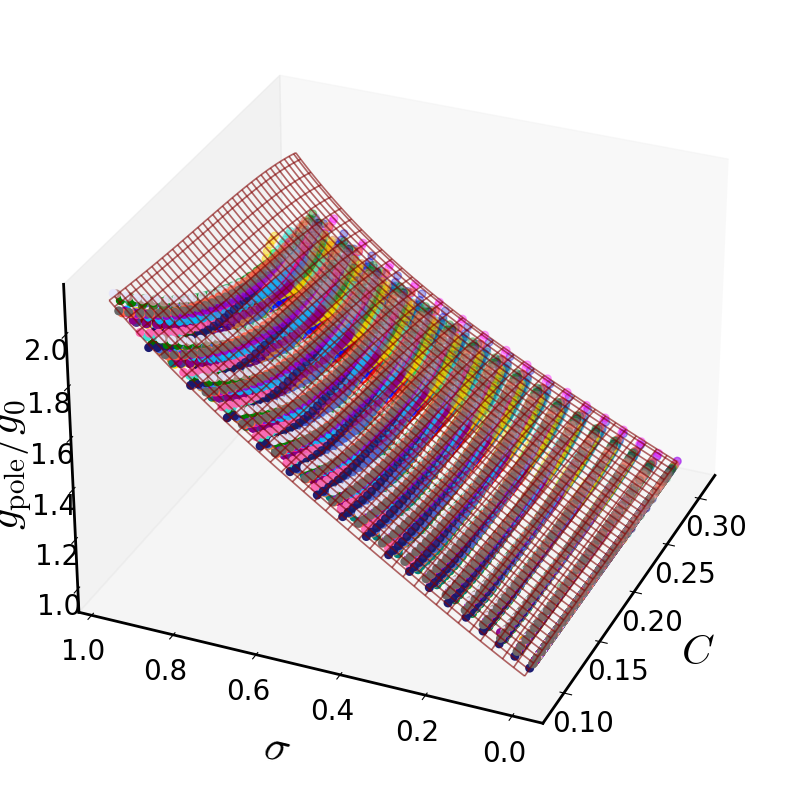

In [52]:
Surface_plot_funct_gp(eos_data, x, y, z, xlabel=r'$C$',ylabel='$\sigma$',zlabel=r'$g_{\mathrm{pole}}/g_0$', 
                     view2=203, n_col=3, border_axes=8, X=x4,Y=y4,Z=Z4, l_w=1.2)

### Universal relation for $g_{eq}$ 

In [53]:
x = 'C'; y = 'sigma'; w = 'eccentricity' ;z = 'g_eq_scaled' ; z_model = 'g_eq_scaled_model';

#### Leave one out Cross validation

In [54]:
#cv_results = c_val_performace_results_for_k_2(df,x=x,y=y,w=w,z=z)
#cv_results
#optim_pol_degree = int(cv_results[cv_results['d(%)'] == cv_results['d(%)'].min()]['k'].iloc[0])

In [55]:
cv_results_g_eq = pd.read_csv('LOOCV_results/g_eq_LOOCV_results')
cv_results_g_eq

MAE  Max_Error           MSE       d(%)   MAPE(%)  Explained_Variance  \
0  0.012457   0.090990  2.345235e-04  60.239597  2.356113                 1.0   
1  0.003238   0.028102  1.992911e-05  40.535751  0.643018                 1.0   
2  0.000760   0.012911  1.232216e-06   4.337101  0.169832                 1.0   
3  0.000646   0.012945  1.010815e-06   3.838275  0.147062                 1.0   
4  0.000597   0.013014  9.265978e-07   3.448856  0.137110                 1.0   
5  0.000582   0.013116  9.029801e-07   2.856619  0.134236                 1.0   
6  0.000573   0.013054  8.834424e-07   2.769864  0.131815                 1.0   
7  0.000560   0.013089  8.552114e-07   2.777353  0.129038                 1.0   

     k  
0  1.0  
1  2.0  
2  3.0  
3  4.0  
4  5.0  
5  6.0  
6  7.0  
7  8.0

In [56]:
optim_pol_degree = 3

#### Linear regression on training data

In [57]:
df[z_model], R_2_index, E_00, E_nm, pow_comb_5, powers_5 = Regression_function_2(df,x = x,y = y,w = w ,z = z, pol_degree=optim_pol_degree,
                                              x_power = x,y_power=y,w_power=w)

#### $R^2$ index

In [58]:
R_2_index

0.9999763625907374

### Model's coefficients

In [59]:
# model's intercept
E_00;
# model's coefficients
E_nm;
# a_nm stored to data frame
coef=pd.DataFrame(E_nm,columns=["coef"])

In [60]:
E_nm

array([ 0.        ,  0.06866332, -1.69175782, -0.02976716, -0.28467956,
        2.33122575,  0.14131776,  0.53280091, -0.75836694,  0.83218179,
        0.33807042,  1.20592156,  0.12888786, -4.03577574,  2.63090429,
       -2.03273805, -0.22100945,  0.36927603,  0.23073066,  0.28904095])

In [61]:
def g_eq_funct(C,sigma,e):
    results=0
    for i in range(0,len(powers_5)):
        results+=(coef["coef"][i]*C**(powers_5["C"][i])*sigma**(powers_5["sigma"][i])*e**(powers_5["eccentricity"][i]))
      
    return E_00 + results 

g_eq_funct(C_s,sigma_s, e_s)

0.338070419688191*C**3 + 1.20592155663032*C**2*\sigma + 0.128887857187797*C**2*e - 0.284679560623361*C**2 - 4.0357757427521*C*\sigma**2 + 2.63090429234693*C*\sigma*e + 2.33122575049243*C*\sigma - 2.03273805025505*C*e**2 + 0.141317760072622*C*e + 0.0686633222621077*C - 0.221009453432658*\sigma**3 + 0.369276028155004*\sigma**2*e + 0.532800911941009*\sigma**2 + 0.23073065963261*\sigma*e**2 - 0.758366940518667*\sigma*e - 1.69175782343621*\sigma + 0.289040948522035*e**3 + 0.832181789667688*e**2 - 0.0297671570402134*e + 0.995124108230518

In [62]:
x5 = mesh_grid_funct_2(100,df,x_name = 'C', y_name = 'sigma', w_name = 'eccentricity')[0]
y5 = mesh_grid_funct_2(100,df, x_name = 'C', y_name = 'sigma', w_name = 'eccentricity')[1]
w5 = mesh_grid_funct_2(100,df, x_name = 'C', y_name = 'sigma', w_name = 'eccentricity')[2]

Z5 = g_eq_funct(x5,y5,w5)

In [63]:
def Surface_plot_funct_geq(eos_data, x,y,w, z, xlabel,ylabel,wlabel,zlabel, view2, n_col,
                         border_axes, X,Y,W, Z, l_w):
    
    fig = plt.figure(figsize=(12, 8)) 
    labels_text_size = 28
    ax = fig.add_subplot(111, projection='3d')

    dot_size = 30
    font_size = 30
    label_pad = 20
    label_size = 20    

    for i in range(0, len(eos_data)):
        scatter = ax.scatter(eos_data[i][x].to_numpy(),eos_data[i][y].to_numpy(),eos_data[i][z].to_numpy(),
                   c = eos_data[i][w].to_numpy(), s = dot_size, cmap='viridis', marker='o')    
    
    
    # Add colorbar
    cbar = plt.colorbar(scatter,  shrink=0.5)
    cbar.set_label(wlabel, fontsize=font_size,rotation=0)
    cbar.ax.tick_params(labelsize=15)
        
    ax.view_init(30, view2)   
    ax.set_xlabel(xlabel, fontsize=font_size,labelpad=label_pad) 
    ax.set_ylabel(ylabel, fontsize=font_size,labelpad=label_pad) 
    
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel(zlabel, fontsize=font_size,labelpad=label_pad,rotation = 90)

    ax.zaxis._axinfo['label']['space_factor'] = -30.0
    
    ax.zaxis.set_tick_params(pad=0.)
    ax.zaxis.labelpad = 5#0.4 
    
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    ax.zaxis.set_tick_params(labelsize=label_size)
    
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.line.set_linewidth(2)
    
    ax.grid(False)
    
    plt.tight_layout()    
    plt.show()

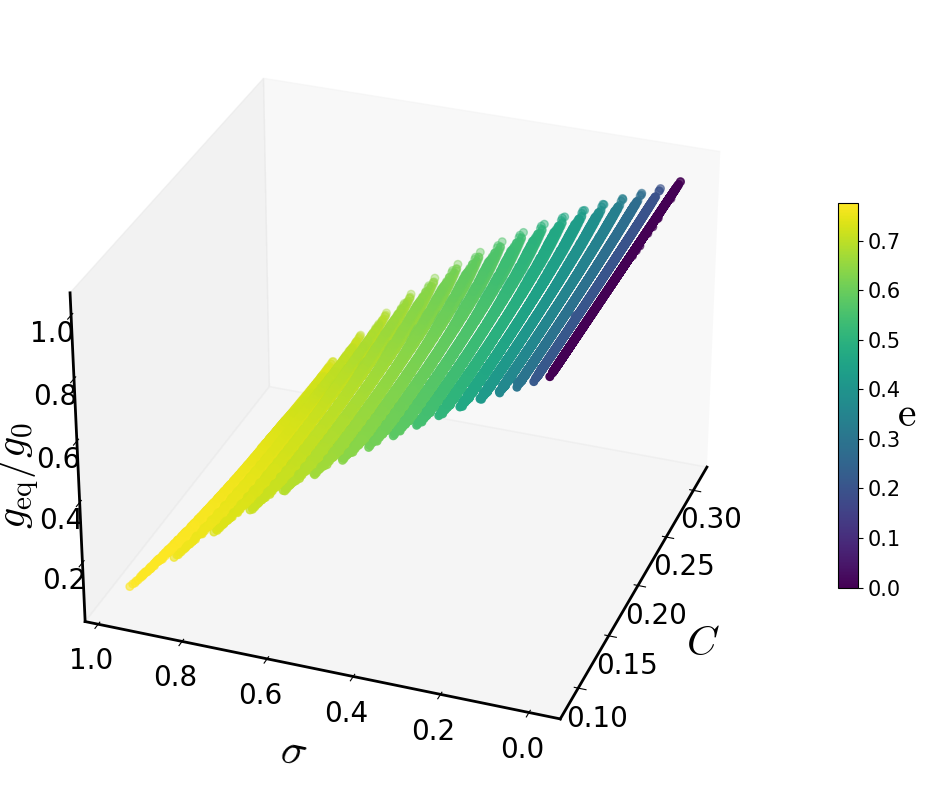

In [64]:
Surface_plot_funct_geq(eos_data, x,y,w,z, xlabel=r'$C$',ylabel='$\sigma$',
                     wlabel = r'$\mathrm{e}$',zlabel=r'$g_{\mathrm{eq}}/g_0$', 
                     view2=200, n_col=3, border_axes=8, X=x5,Y=y5,W = w5,Z=Z5, l_w=1.5)

#### Absolute relative error distribution

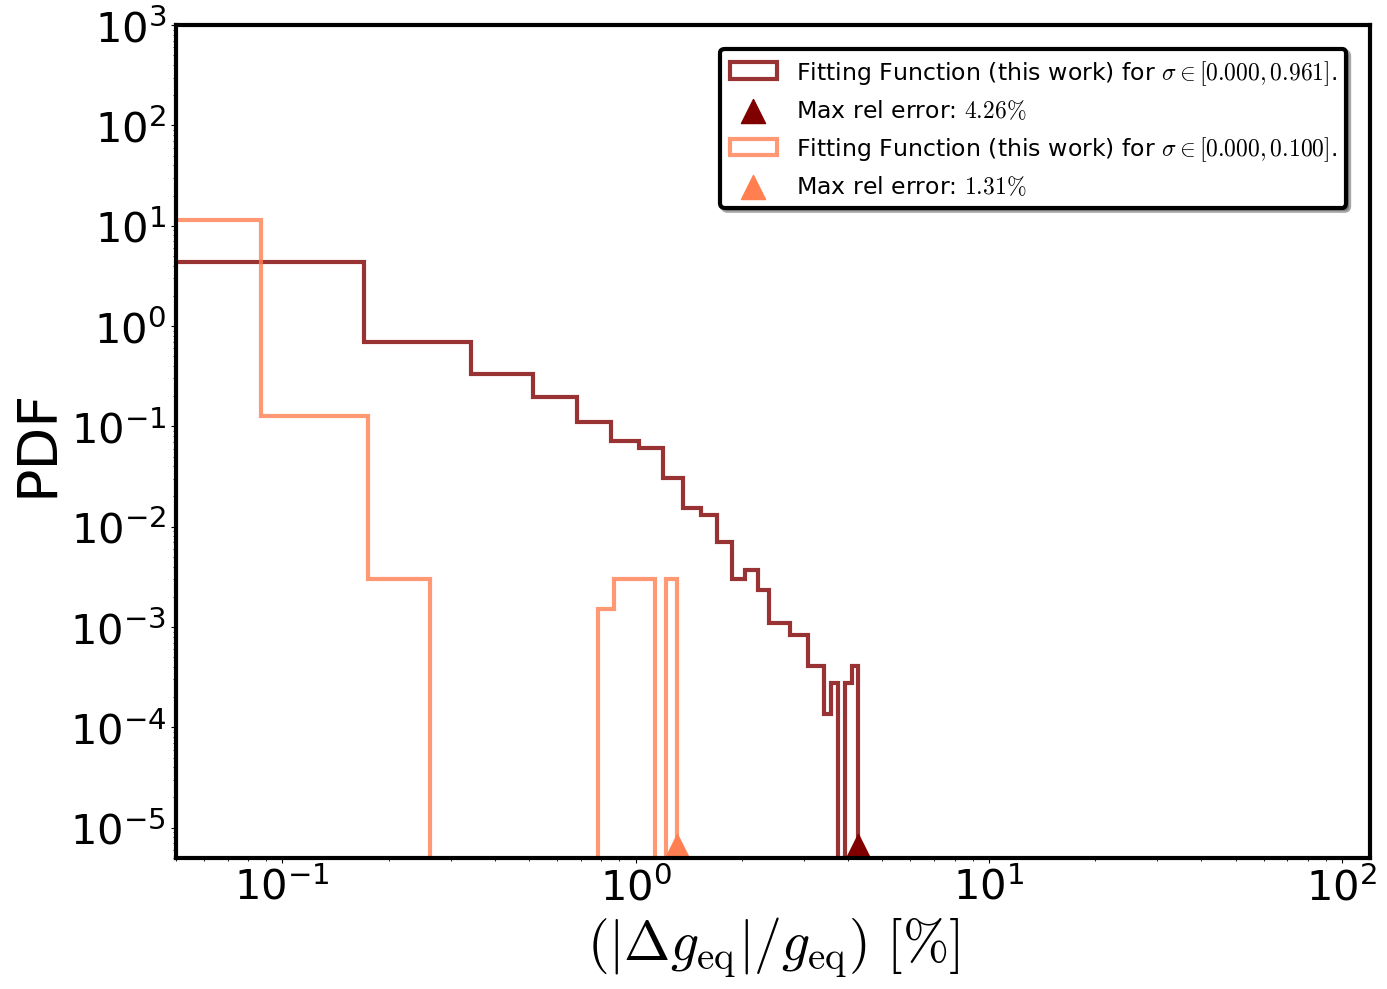

In [65]:
fig,ax = plt.subplots(figsize=(14, 10),)
labels_text_size = 40
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)

xlabel = r'$(|\Delta g_{\mathrm{eq}}| /g_{\mathrm{eq}}) \ [\%]$'
ylabel = 'PDF'



plt.xlabel(xlabel,size=labels_text_size)
plt.ylabel(ylabel,size=labels_text_size)

bins = 45
alpha = 0.8


y_reg_grav_model = abs(100*(-df[z]+df[z_model])/df[z]).hist(
    density = True,
    bins=bins-20,
    lw = 3,
    edgecolor ='maroon', 
    histtype='step',
    zorder = 1, 
    alpha = alpha,
    label = f"Fitting Function (this work) for $\sigma \in [0.000, {np.round(df2['sigma'].max(), 3)}]$.", color = 'maroon').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines = [4.264130569493755, None]  
plt.scatter(vertical_lines[0], 0.65e-5, color='maroon', marker='^', s=300, zorder=2, label=r'Max rel error: $4.26\%$')  


y_reg_grav_model = abs(100*(-df[df['sigma']<=0.1][z]+df[df['sigma']<=0.1][z_model])/df[df['sigma']<=0.1][z]).hist(
    density = True,
    bins=bins-30,
    lw = 3,
    edgecolor ='coral', 
    histtype='step',
    zorder = 1, 
    alpha = alpha,
    label = f"Fitting Function (this work) for $\sigma \in [0.000, 0.100]$.", 
   color = 'coral').autoscale(enable = True, axis = 'both', tight = True)


vertical_lines = [1.307, None] 
plt.scatter(vertical_lines[0], 0.65e-5, color='coral', marker='^', s=300, zorder=2, label=r'Max rel error: $1.31\%$')  

plt.yscale('log')
plt.xscale('log')


plt.ylim(0.5e-5,1000)
plt.xlim(0.5e-1,120)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.0)

plt.grid(False)
leg = plt.legend(loc="upper right",ncol=1, borderaxespad=1, prop={'size': 17}, shadow=True, fontsize="large")    
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('black')
    
plt.tight_layout()
plt.show()

In [66]:
abs(100*(-df[z]+df[z_model])/df[z]).max()

4.264130569493755

In [67]:
abs(100*(-df[df['sigma']<=0.1][z]+df[df['sigma']<=0.1][z_model])/df[df['sigma']<=0.1][z]).max()

1.3072154897475385

#### EoS insensitive relation for $(d\log R/d \theta) max$ 

In [68]:
x = 'C'; y = 'sigma'; w = 'Rpol/Req' ;z = 'dlogR_dtheta_max' ; z_model = 'dlogR_dtheta_max_model';

#### Leave one out Cross validation

In [69]:
#cv_results = c_val_performace_results_for_k_2(df2,x=x,y=y,w=w,z=z)
#cv_results
#optim_pol_degree = int(cv_results[cv_results['d(%)'] == cv_results['d(%)'].min()]['k'].iloc[0])


In [70]:
cv_results_dLogR = pd.read_csv('LOOCV_results/dLogR_dtheta_LOOCV_results.txt')
cv_results_dLogR

MAE  Max_Error           MSE       d(%)   MAPE(%)  Explained_Variance  \
0  0.003774   0.026318  2.375680e-05  79.081525  4.046781                 1.0   
1  0.000669   0.021541  1.258866e-06   5.234422  0.395973                 1.0   
2  0.000497   0.007817  7.828603e-07   3.227351  0.231198                 1.0   
3  0.000438   0.007156  6.900567e-07   5.798164  0.182552                 1.0   
4  0.000416   0.006877  6.532774e-07   2.612371  0.169510                 1.0   
5  0.000403   0.006840  6.320654e-07   3.912433  0.159825                 1.0   
6  0.000395   0.006831  6.143983e-07   2.627716  0.157560                 1.0   
7  0.000382   0.006846  5.988247e-07   3.535615  0.144146                 1.0   

     k  
0  1.0  
1  2.0  
2  3.0  
3  4.0  
4  5.0  
5  6.0  
6  7.0  
7  8.0

In [71]:
optim_pol_degree = 3

#### Linear regression on training data

In [72]:
df2[z_model], R_2_index, F_00, F_nm, pow_comb_6, powers_6 = Regression_function_2(df2,x = x,y= y, w = w ,z = z, 
                           pol_degree=optim_pol_degree, x_power = x,y_power=y, w_power = w)

### $R^2$ index

In [73]:
R_2_index

0.9999491798375334

#### Absolute relative error distribution

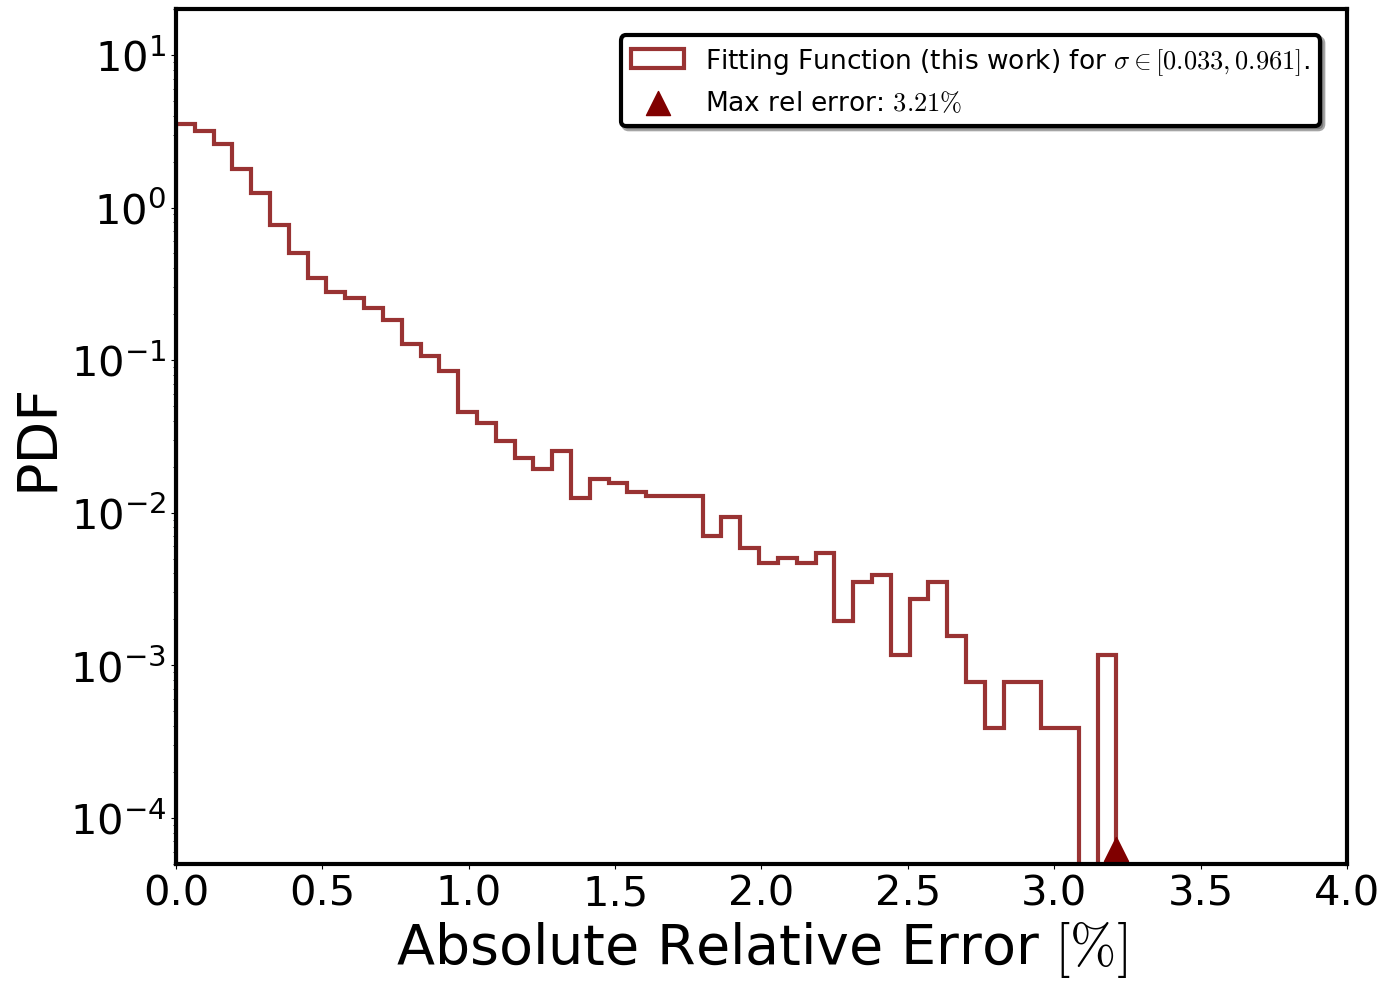

In [74]:
fig,ax = plt.subplots(figsize=(14, 10),)
labels_text_size = 40
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)


xlabel = r'Absolute Relative Error$\ [\%]$'
ylabel = r'PDF'


plt.xlabel(xlabel,size=labels_text_size)
plt.ylabel(ylabel,size=labels_text_size)

bins = 50
alpha = 0.8

log_reg_model = abs(100*(-df2[z]+df2[z_model])/df2[z]).hist(
    density = True,
    lw = 3,
    bins=bins,
    edgecolor ='maroon',
    histtype='step',
    zorder = 1,
    alpha = alpha, 
    label = f"Fitting Function (this work) for $ \sigma \in[{np.round(df2['sigma'].min(), 3)}, {np.round(df2['sigma'].max(), 3)}]$.",
    color = 'maroon').autoscale(enable = True, axis = 'both', tight = True)

vertical_lines = [3.2128461268526847] 
plt.scatter(vertical_lines[0], 0.625e-4, color='maroon',  marker='^', s=300, zorder=2, label=r'Max rel error: $ 3.21 \%$')  

plt.yscale('log')

plt.ylim(0.5e-4,20)

plt.xlim(0,4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3.0)

plt.grid(False)
leg = plt.legend(loc="upper right",ncol=1, borderaxespad=1, prop={'size': 19}, shadow=True, fontsize="large")    
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('black')
    
plt.tight_layout()
plt.show()

### Model's coefficients

In [75]:
# model's intercept
F_00;
# model's coefficients
F_nm; 
# F_nm stored to data frame
coef=pd.DataFrame(F_nm,columns=["coef"])

In [76]:
def dLogR_dtheta_max_funct(C,sigma,R_s):
    results=0
    for i in range(0,len(powers_6)):
        results+=(coef["coef"][i]*C**(powers_6[x][i])*sigma**(powers_6[y][i])*R_s**(powers_6[w][i]))
      
    return F_00 + results 

dLogR_dtheta_max_funct(C_s,sigma_s, R_s)

-0.403276601294769*C**3 + 2.57434191156734*C**2*\mathcal{R} + 0.66151909779781*C**2*\sigma - 2.23108454812405*C**2 - 45.0567823427942*C*\mathcal{R}**2 - 39.6796750694061*C*\mathcal{R}*\sigma + 87.0956609309219*C*\mathcal{R} - 8.6762573974298*C*\sigma**2 + 38.4663786236091*C*\sigma - 42.1349805655765*C + 53.9663039266245*\mathcal{R}**3 + 72.1353182129612*\mathcal{R}**2*\sigma - 146.85852284865*\mathcal{R}**2 + 30.4880078789053*\mathcal{R}*\sigma**2 - 130.455828718701*\mathcal{R}*\sigma + 131.341936932986*\mathcal{R} + 4.07991541887699*\sigma**3 - 27.2418077134931*\sigma**2 + 58.559061635722*\sigma - 38.441438473346

In [77]:
x6 = mesh_grid_funct_2(100,df2,x_name = x, y_name = y, w_name = w)[0]
y6 = mesh_grid_funct_2(100,df2, x_name = x, y_name = y, w_name = w)[1]
w6 = mesh_grid_funct_2(100,df2, x_name = x, y_name = y, w_name = w)[2]

Z6 = dLogR_dtheta_max_funct(x6,y6,w6)

In [78]:
def Surface_plot_funct_dlog(eos_data, x,y,w, z, xlabel,ylabel,wlabel,zlabel, view2, n_col,
                         border_axes, X,Y,W, Z, l_w):
    
    fig = plt.figure(figsize=(12, 8)) 
    labels_text_size = 24
    ax = fig.add_subplot(111, projection='3d')

    dot_size = 28
    font_size = 27
    label_pad = 20
    label_size = 20    
   
    for i in range(0, len(eos_data)):
        scatter = ax.scatter(eos_data[i][x].to_numpy(),eos_data[i][y].to_numpy(),eos_data[i][z].to_numpy(),
                   c = eos_data[i][w].to_numpy(), s = dot_size, cmap='viridis', marker='o')    
        
    cbar = plt.colorbar(scatter,  shrink=0.5)
    cbar.set_label(wlabel, fontsize=font_size, rotation=0)
    cbar.ax.tick_params(labelsize=15)
    
    
    ax.view_init(30, view2)   
    ax.set_xlabel(xlabel, fontsize=font_size,labelpad=label_pad) 
    ax.set_ylabel(ylabel, fontsize=font_size,labelpad=label_pad) 
    
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel(zlabel, fontsize=font_size,labelpad=label_pad,rotation = 90) 
    ax.yaxis._axinfo['label']['space_factor'] = 3.0   

    ax.zaxis.set_tick_params(pad=0.)
    ax.zaxis.labelpad = 5
    
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    ax.zaxis.set_tick_params(labelsize=label_size)
    
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.line.set_linewidth(2)
    
    ax.grid(False)
    
    plt.tight_layout()    
    plt.show()    

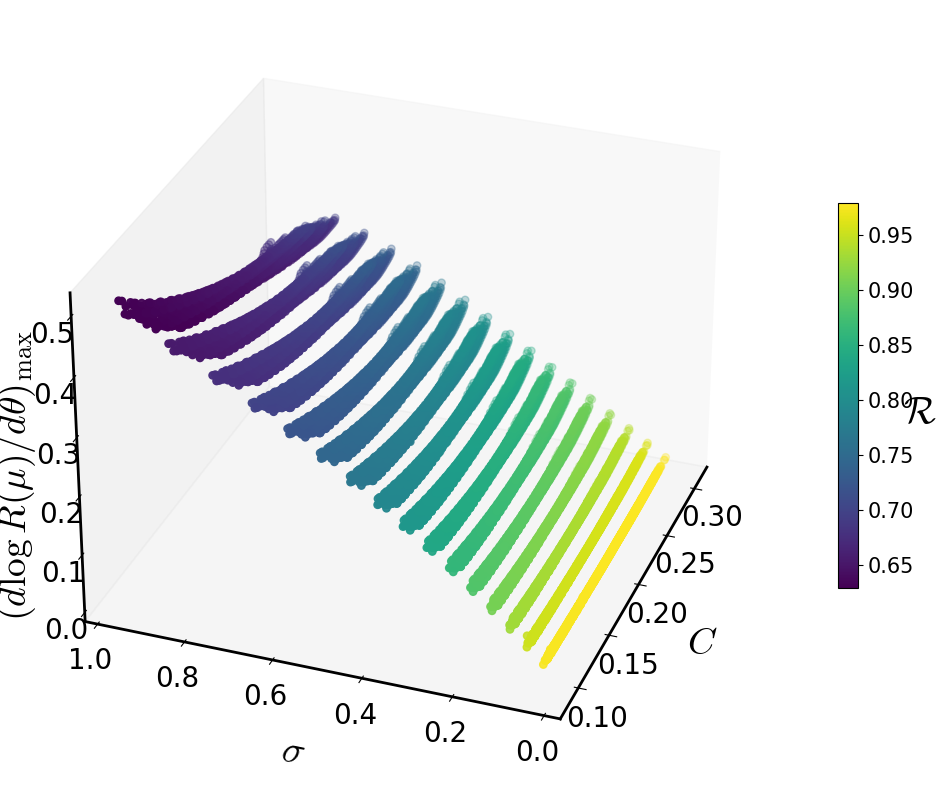

In [79]:
Surface_plot_funct_dlog(eos_data2, x,y,w,z, xlabel=r'$C$',ylabel='$\sigma$',
                     wlabel = r'$\mathcal{R}$',zlabel=r'$\left(d\log R(\mu)/ d\theta \right)_{\mathrm{max}}$', 
                     view2=200, n_col=3, border_axes=8, X=x6,Y=y6,W = w6,Z=Z6, l_w=1.5) #219